# Análise de dados sobre jogos

Este trabalho visa fazer uma análise exploratória sobre o mundo dos jogos, procurando entender tendências e relações sobre váriaveis como vendas, gênero, títulos, franquias... Em 2018, os games se tornaram mais lucrativos do que a indústria de Hollywood e a indústria musical combinadas, movimentando US$ 137 bilhões globalmente, além disso, estima-se que haja 2,7 bilhões de jogadores em todo o mundo (quase 1/3 da população), logo, é um assunto interessante para ser analisado.

A base de dados escolhida é do Kaggle e pode ser acessada [aqui](https://www.kaggle.com/gregorut/videogamesales).

Abaixo, estão algumas das perguntas que procuramos responder:
- Como as plataformas se destacam? (Quais possuem mais títulos?, quais venderam mais?, uma coisa implica na outra?, como isso varia com o tempo?) 
- Como se sobressaem os títulos de franquias ou sequências grandes? (Tentar identificar sequências como Sonic 1, Sonic 2, Sonic 3...)
- Como é a relação entre Gêneros dos Jogos e as regiões de vendas? (Onde vendem mais jogos de ação e quanto isso varia?)

Abaixo estão as bibliotecas utilizadas no decorrer do trabalho.

In [126]:
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Importação da base de dados

In [127]:
df = pd.read_csv ("vgsales.csv")
df = pd.DataFrame(df)
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


As variáveis dessa base de dados possuem as seguintes características:

In [25]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Além disso, é importante verificar se a base de dados não possui valores nulos. A função isnull().sum() mostra a quantidade de valores nulos para cada variável e a função dropna() remove-os, caso existirem. Além disso, a tabela é atualizada apenas até 2016, portanto, foram retirados a partir de 2017 (a tabela já não incluia 2018 e 2019, devido a informações incompletas). 

In [37]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [128]:
df = df.dropna()
# Deletando algumas linhas que possuem os anos superiores à 2015 
filtro  = df['Year'] <2016
df = df[filtro]
Year = df['Year'].unique()
Year #Mostrando que agora temos apenas os anos até 2015

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980., 1983.])

Também, é interessante ver o número de diferentes ocorrências em cada variável:

In [68]:
jogos = df['Name'].unique()
editoras = df['Publisher'].unique()
plataformas = df['Platform'].unique()
gêneros = df['Genre'].unique()

print("Número de jogos: ", len(jogos))
print("Número de editoras: ", len(editoras))
print("Número de plataformas: ", len(plataformas))
print("Número de gêneros de jogos: ", len(gêneros))

Número de jogos:  11130
Número de editoras:  564
Número de plataformas:  31
Número de gêneros de jogos:  12


### Como as plataformas se destacam? 

Primeiramente, a partir da base de dados analisada, as plataformas podem se destacar de duas principaias maneiras: número de títulos e vendas. A seguir, tem-se uma tabela e um gráfico que mostram as 10 plataformas mais utilizadas, de acordo com a base de dados escolhida, ou seja, a quantidade de títulos por plataforma.

In [69]:
#contagem da quantidade de vezes que cada plataforma aparece na tabela
per = pd.DataFrame(df['Platform'].value_counts()) 
#tranformação em porcentagem
per['Porcentagens %'] = round(((per['Platform']/df['Platform'].count())*100),2) 
pd.DataFrame(per['Porcentagens %'].head(10)) 

,Porcentagens %
DS,13.36
PS2,13.34
Wii,8.09
PS3,7.98
X360,7.69
PSP,7.51
PS,7.46
PC,5.64
XB,5.04
GBA,4.93


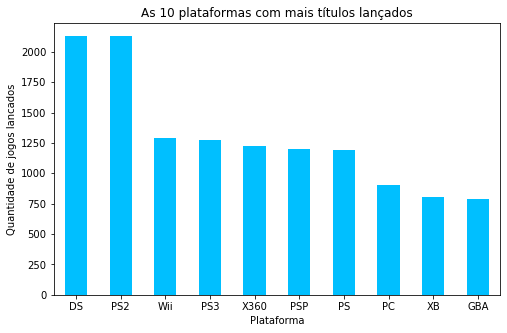

In [70]:
#criando o gráfico (principais funções: value_counts() conta as ocorências, kind=tipo de plotagem, rot=rotaciona o nome das plataformas)
df["Platform"].value_counts().head(10).plot(kind="bar", figsize=(8,5), grid = False, rot=0, color="DeepSkyBlue")  
plt.title('As 10 plataformas com mais títulos lançados') #definindo um titulo
plt.xlabel('Plataforma') #Nomeando o eixo X, onde fica o nome dos videogames 
plt.ylabel('Quantidade de jogos lancados') #Nomeando o eixo Y, onde fica a quantidade de jogos 
plt.show() #Exibindo o gráfico 


A partir desse gráfico, é possível visualizar que as plataformas DS e PS2 lançaram a maior quantidade de títulos. Mas e as vendas, correspondem ao resultado visto?
Para isso, pode-se verificar as vendas globais por plataforma, como será feito a seguir.

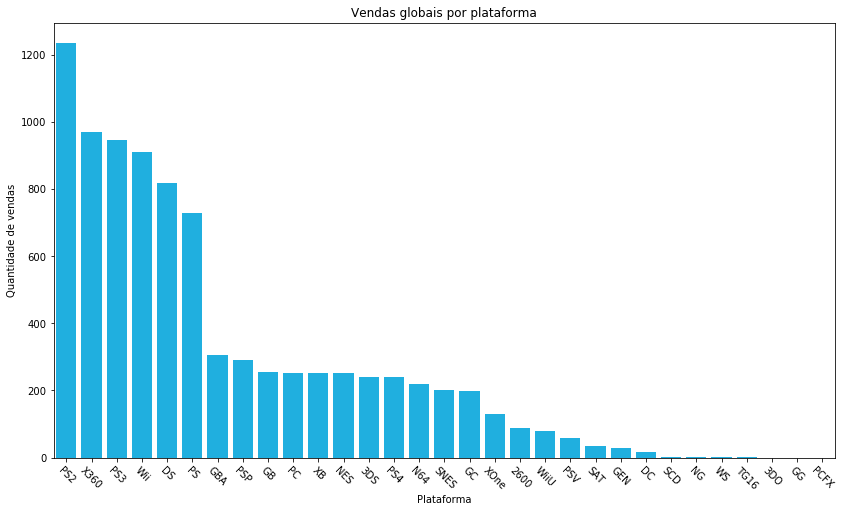

In [71]:
df1 = df[['Platform','Global_Sales']] #tabela com os dados necessários
df1=df1.groupby('Platform').sum().reset_index() #soma das vendas por plataforma
df1=df1.sort_values('Global_Sales', ascending=False).reset_index() #ordenação dos dados pelas vendas
plt.figure(figsize=(14, 8))
sns.barplot(x='Platform', y="Global_Sales", data=df1, color="DeepSkyBlue")
plt.xticks(rotation=-45)
plt.title('Vendas globais por plataforma') 
plt.xlabel('Plataforma') 
plt.ylabel('Quantidade de vendas') 
plt.show() 

Viu-se que, de fato, as 5 plataformas com maio quantidade de títulos, são as que mais possuem vendas, contudo, a plataforma DS ocupa a 5ª posição, mesmo tendo uma considerável quantidade a mais de títulos lançados que as plataformas X360, PS3 e Wii, que ocupam posições superiores. Além disso, a distribuição, tanto das vendas quanto do número de lançamentos por plataformas possuem elevadas disparidades. 

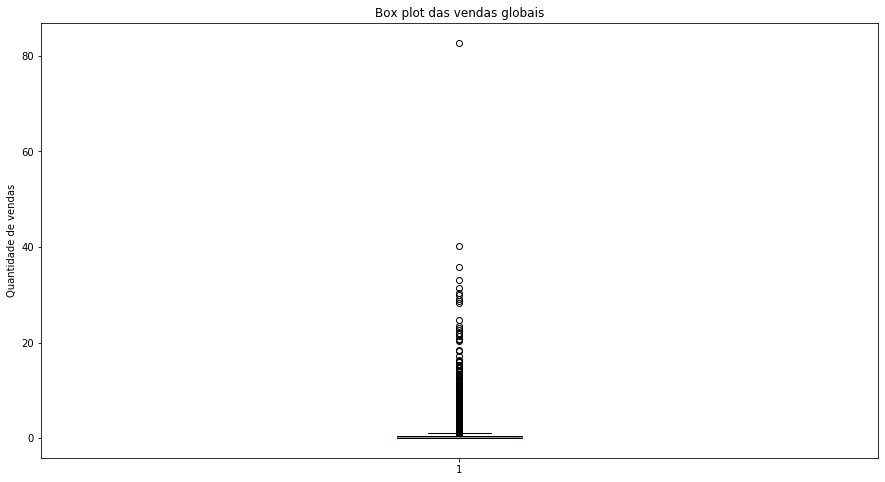

In [195]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
ax.boxplot(df['Global_Sales'])
plt.title('Box plot das vendas globais') 
plt.ylabel('Quantidade de vendas') 
plt.show()

Pelo gráfico boxplot acima, fica vísivel que existem diversos outliers, ou seja, a distribuição das vendas globais é bastante desigual. O mesmo se repete com a maior parte das plataformas, como observado no boxplot a seguir. Ainda, vê-se que, em geral, a maior parte dos jogos possui vendas abaixo de 20 milhões.

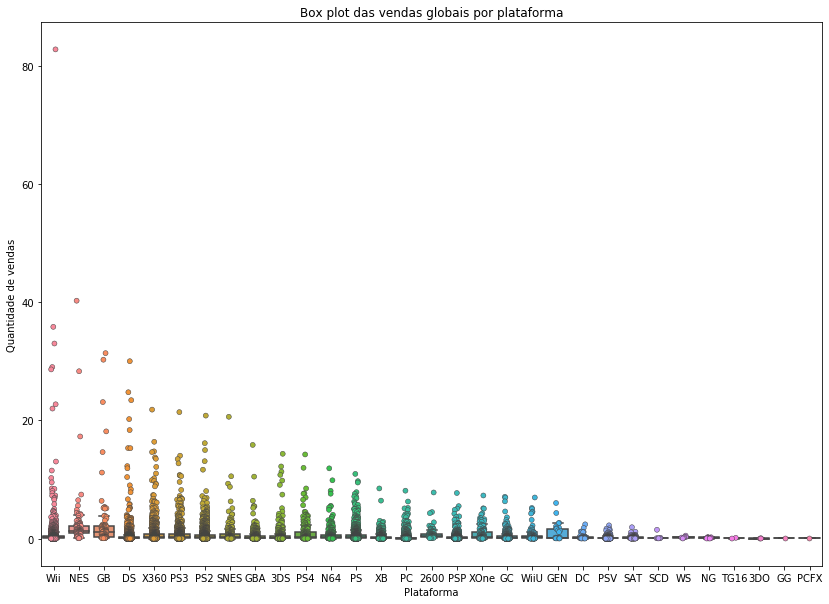

In [196]:
plt.figure(figsize=(14,10))
sns.boxplot(x='Platform', y='Global_Sales',  data=df, fliersize=0)
sns.stripplot(x='Platform', y='Global_Sales',  data=df,
    jitter=True, dodge=True, linewidth=0.5)
plt.title('Box plot das vendas globais por plataforma') 
plt.ylabel('Quantidade de vendas (milhões $)') 
plt.xlabel('Plataforma') 
plt.show()

Mas quais são esses maiores outliers? Qual jogo teve vendas maiores que 80 milhões?

Para visualizar essa informação, foram construídas uma tabela com os jogos mais vendidos (nessa tabela serão mostrados os com vendas acima de 20 milhões) e um gráfico de barra com os maiores destaques.

In [200]:
venda_global = df["Global_Sales"]
df.loc[venda_global > 25]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 864x576 with 0 Axes>

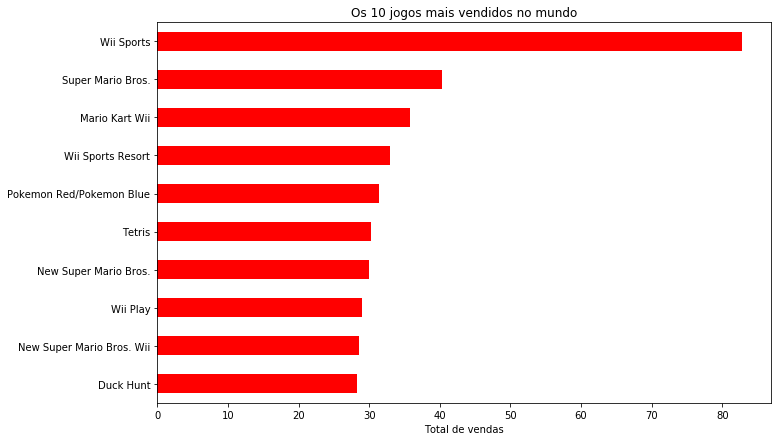

In [206]:
#0s 10 jogos mais vendidos do historia 
top_10 = df[['Name', 'Global_Sales']].head(10).set_index('Name').sort_values('Global_Sales', ascending=True)
plt.figure(figsize=(12,8))
top_10.plot(kind='barh', figsize=(11,7), grid=False, color='red', legend=False) 
plt.title('Os 10 jogos mais vendidos no mundo') 
plt.xlabel('Total de vendas') 
plt.ylabel('')
plt.show 


In [ ]:
O jogo Wii Sports realmente

### Ao longo do tempo, como as vendas ocorreram?

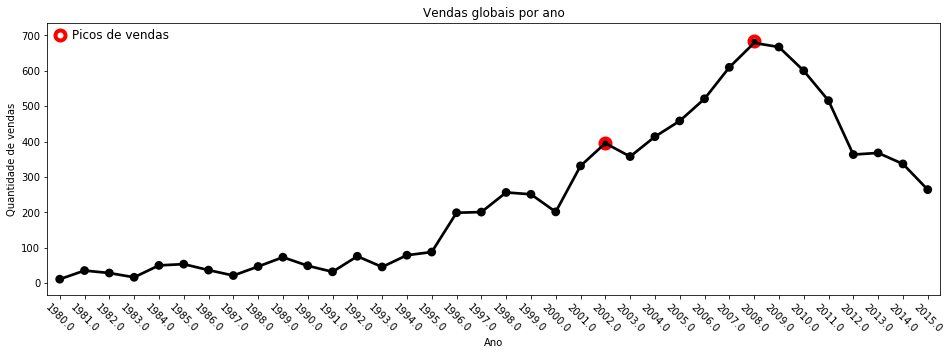

In [119]:
df_vendas_tempo = df[['Year','Global_Sales']] #tabela com os dados necessários
df_vendas_tempo=df_vendas_tempo.groupby('Year').sum().reset_index() #soma das vendas por plataforma
plt.figure(figsize=(16,5))
ax = plt.gca() #criação de pontos para destaque
ax.plot(22, 396, 'o', ms=10, mec='r', mfc='none',  mew=4,)
ax.plot(28, 684, 'o', ms=10, mec='r', mfc='none',  mew=4,)
ax.plot(0, 700, 'o', ms=10, mec='r', mfc='none',  mew=4,)
ax.annotate('Picos de vendas', xy=(0.5, 700), xytext=(0.5, 690),color='black', size='large') # anotação com o motivo dos destaques
sns.pointplot(x='Year', y='Global_Sales', data=df_vendas_tempo, color="black") 
plt.xticks(rotation=-45)
plt.xticks(rotation=-45)
plt.title('Vendas globais por ano') 
plt.xlabel('Ano') 
plt.ylabel('Quantidade de vendas') 
plt.show() 

É possível observar um pico no ano de 2002 e outro em 2008. Basicamente, em 2000, a Sony continuou com o seu bem-sucedido Playstation e lançou a versão 2, que passou a ter mídias em formato DVD. Por sua vez, em 2001, a Nintendo trouxe o GameCube, que sucedeu o N64, além também da entrada da Microsoft no mercado, com o famoso Xbox, motivos que, provavelmente, resultaram em quase 400 milhões de jogos vendidos naquele ano. Já em 2008, os lançamentos do XBOX 360 (2005), PS3 (2006) e a "era" Wii (2006, em diante), trouxeram elevados aumentos nas vendas. 
Mas e por que o declínio?  
Um dos maiores apontamentos seria o custo benefício apresentado pelos PCs, que entregam alta qualidade gráfica por um maior período de tempo e até mesmo a saturação na indústria de jogos, com a falta de novos jogos e consoles para manter os clientes interessados, afinal, nitidamente, no gráfico a seguir, quantidade de jogos lançados acompanha o gráfico de vendas. Também, é importante levar em conta que, no ano de 2008, a crise financeira pode ter feito com que os consumidores reduzissem gastos desnecessários.
Contudo, atualmente, parece que com a chegada do PS4, Nintendo Switch, PS5 e dos novos Xbox Series, a indústria ganhou fôlego para continuar viva por mais tempo. 

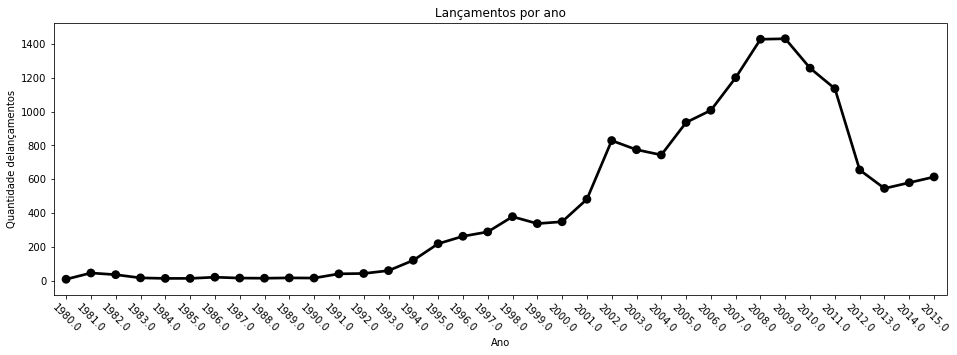

In [176]:
df_year = df["Year"].value_counts().reset_index()
df_year = df_year.rename(columns={'Year': 'lancamentos'})
df_year= df_year.rename(columns={'index': 'year'})
df_year=df_year.sort_values('year')
plt.figure(figsize=(16,5))
sns.pointplot(x='year', y='lancamentos', data=df_year, color="black") 
plt.xticks(rotation=-45)
plt.xticks(rotation=-45)
plt.title('Lançamentos por ano') 
plt.xlabel('Ano') 
plt.ylabel('Quantidade delançamentos') 
plt.show() 